<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/RSI_Monthly_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"To find the relationship between RSI and monthly returns you can use the k-means technique of unsupervised learning. The steps are as follows:

1. Calculate RSI and monthly returns
2. Scale the data
3. Apply k-means for optimum number of clusters. Use the WCSS technique to select the optimum clusters.
4. Plot the clusters on the X-Y chart and see the relationship between RSI values and monthly returns."

In [477]:
#!pip install yfinance
!pip install pandas_ta==0.2.45b0

In [478]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [479]:
from sklearn.preprocessing import StandardScaler

In [480]:
data=yf.download('^nsei','2015-01-01','2020-12-01')

[*********************100%***********************]  1 of 1 completed


In [481]:
data.ta.rsi(length=18,append='True')
data['ret30']=data['close'].pct_change(30)
print()

In [482]:
data.tail(5)

,open,high,low,close,adj_close,volume,RSI_18,ret30
date,,,,,,,,
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,71.290317,0.084962
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,73.256762,0.094226
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,65.945418,0.077414
2020-11-26,12906.450195,13018.000000,12790.400391,12987.000000,12987.000000,549800,68.145642,0.084867
2020-11-27,13012.049805,13035.299805,12914.299805,12968.950195,12968.950195,1162400,67.497551,0.110322


In [483]:
selected_data=data[['RSI_18','ret30']].dropna()

In [484]:
selected_data.shape

(1420, 2)

In [485]:
selected_data.tail(2)

,RSI_18,ret30
date,,
2020-11-26,68.145642,0.084867
2020-11-27,67.497551,0.110322


In [486]:
sc=StandardScaler()

In [487]:
data_transformed=pd.DataFrame(sc.fit_transform(selected_data), columns = selected_data.columns)
data_transformed

,RSI_18,ret30
0,0.711996,0.634089
1,0.944420,0.782614
2,1.042215,1.358368
3,0.632194,1.290981
4,0.160892,0.856719
...,...,...
1415,1.611859,1.205657
1416,1.791444,1.354137
1417,1.123739,1.084690
1418,1.324673,1.204145


In [488]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

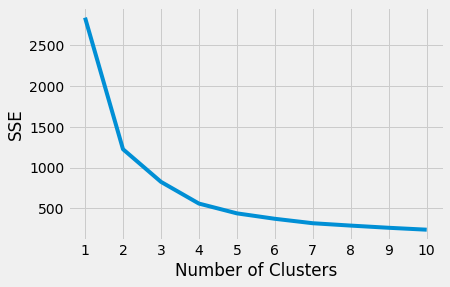

In [489]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [490]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(data_transformed)

KMeans(init='random', n_clusters=4, random_state=42)

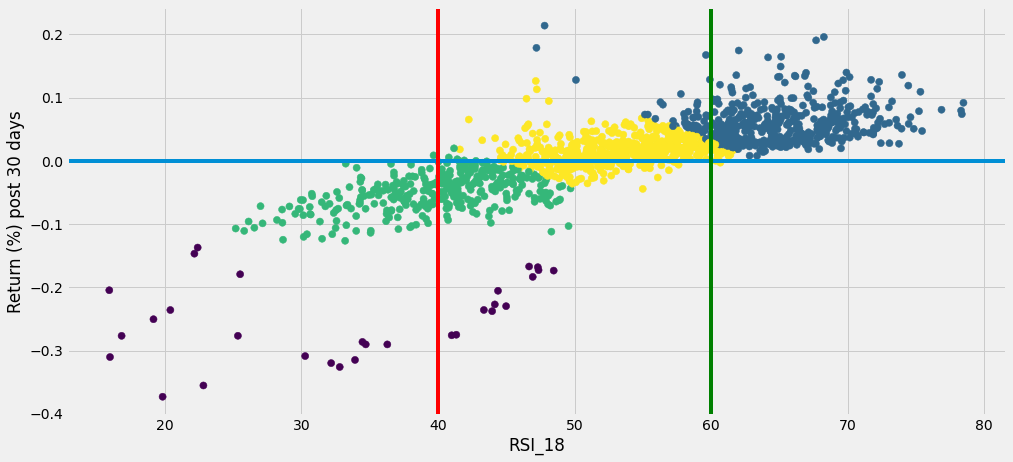

In [491]:
# Getting list of cluster numbers for each data point in X
clusters = kmeans.predict(data_transformed)

# Plotting values
color_map = clusters
plt.figure(figsize=(15, 7))
plt.scatter(selected_data.iloc[:, 0],
            selected_data.iloc[:, 1], c=color_map, s=50, cmap='viridis')

# Plotting centroids
centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('RSI_18')
plt.ylabel('Return (%) post 30 days')
plt.axhline(y=0)
plt.axvline(x=40, color='r')
plt.axvline(x=60,color='g')
plt.show()

In [493]:
data_transformed['pct_change']=data['close'][29:].pct_change().dropna().shift(-1).values

In [494]:
data_transformed['sign']=np.sign(data['close'][29:].pct_change().dropna().shift(-1).values)

In [495]:
data_transformed['cluster']=clusters

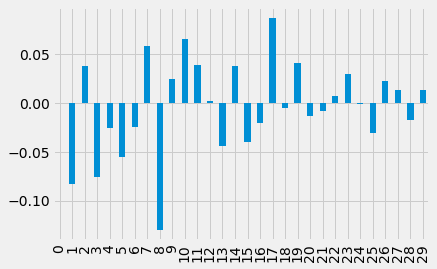

In [514]:
data_transformed[data_transformed['cluster']==0]['pct_change'].reset_index(drop=True).plot(kind='bar');

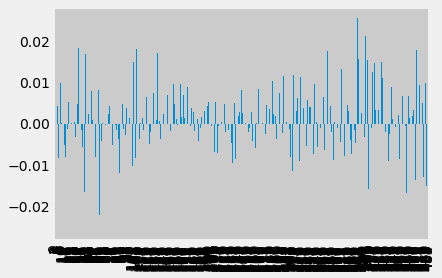

In [510]:
data_transformed[data_transformed['cluster']==1]['pct_change'][:].reset_index(drop=True).plot(kind='bar');

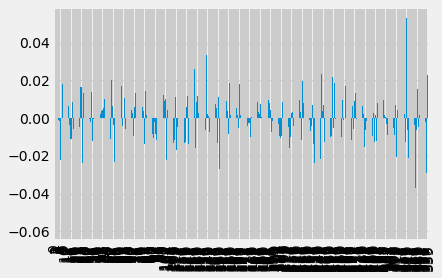

In [511]:
data_transformed[data_transformed['cluster']==2]['pct_change'].reset_index(drop=True).plot(kind='bar');

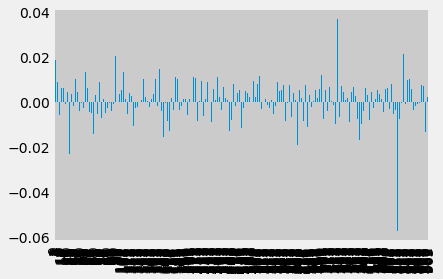

In [512]:
data_transformed[data_transformed['cluster']==3]['pct_change'].reset_index(drop=True).plot(kind='bar');

In [521]:
(data_transformed[data_transformed['cluster']==3]['sign']==1).sum()

315

In [522]:
(data_transformed[data_transformed['cluster']==3]['sign']==-1).sum()

249

In [523]:
(data_transformed[data_transformed['cluster']==1]['sign']==1).sum()

258

In [524]:
(data_transformed[data_transformed['cluster']==1]['sign']==-1).sum()

226

In [525]:
(data_transformed[data_transformed['cluster']==2]['sign']==1).sum()

165

In [526]:
(data_transformed[data_transformed['cluster']==2]['sign']==-1).sum()

174

In [528]:
(data_transformed[data_transformed['cluster']==0]['sign']==1).sum()

15

In [529]:
(data_transformed[data_transformed['cluster']==0]['sign']==-1).sum()

15